In [59]:
import pandas as pd
data = pd.read_csv('预测数据处理.csv')
data.head()

理财金额k  客户AUM（ECIF8种金融资产余额）k  国际卡总额  非国际卡总数  6个月存款月日均金额k  \
0  888.30651             934.33847      0       0    65.067177   
1   63.40673             104.04748      2       2    67.101303   
2  996.58831            1274.02781      1       1   132.924055   
3  354.09243             354.15932      1       1    34.230918   
4  101.34514             785.27740      1       1   614.709707   

   最近6个月客户月平均资产总计k  潜在基金需求预测k  
0       686.993588         31  
1       305.981308         32  
2       649.653533         90  
3       335.513277         21  
4       811.098440         24

In [12]:
data=data[data['潜在基金需求预测k']/data['理财金额k']<0.41]
data=data[data['潜在基金需求预测k']>0]

In [13]:
data.head()


id      理财金额k  客户AUM（ECIF8种金融资产余额）k  国际卡总额  非国际卡总数  6个月存款月日均金额k  \
2   3  200.74781             371.39017      1       2   184.496478   
4   5  102.28082             103.49148      0       0     1.351635   
5   6  160.80034             160.95380      0       0     0.770795   
6   7  478.68236             599.57276      1       1    35.501427   
7   8  641.83452            1830.24580      2       4   963.716737   

   最近6个月客户月平均资产总计k  潜在基金需求预测k  
2       672.664868         48  
4       102.088393         31  
5       141.766555         32  
6       592.888820         98  
7      1211.535332         56

In [14]:
print(len(data))

4727


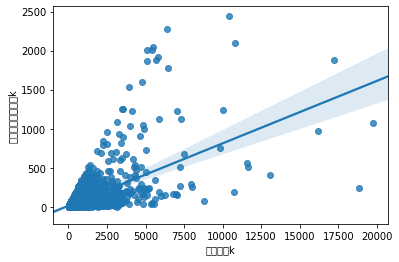

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt
 

data=data[data['理财金额k']<20000]
data=data[data['潜在基金需求预测k']<2500]
# 绘图显示
sns.regplot(x=data["理财金额k"], y=data["潜在基金需求预测k"])
plt.show()


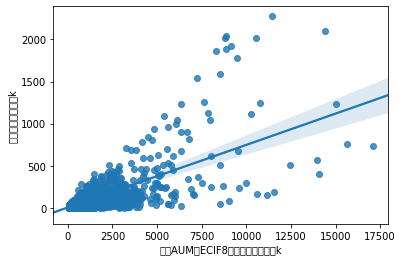

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
 
data=data[data['客户AUM（ECIF8种金融资产余额）k']<17500]
# 绘图显示
sns.regplot(x=data["客户AUM（ECIF8种金融资产余额）k"], y=data["潜在基金需求预测k"])
plt.show()

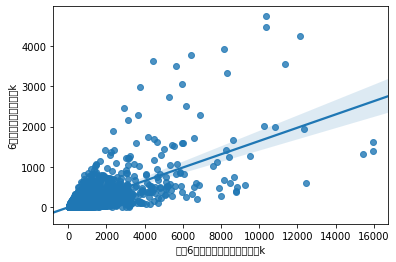

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

data=data[data['6个月存款月日均金额k']<5000]
# 绘图显示
sns.regplot(x=data["最近6个月客户月平均资产总计k"], y=data["6个月存款月日均金额k"])
plt.show()

In [60]:
data=data[data['潜在基金需求预测k']>0]

In [61]:
data['理财金额k']=data['潜在基金需求预测k']/data['理财金额k']
data['客户AUM（ECIF8种金融资产余额）k']=data['潜在基金需求预测k']/data['客户AUM（ECIF8种金融资产余额）k']
data['最近6个月客户月平均资产总计k']=data['6个月存款月日均金额k']/data['最近6个月客户月平均资产总计k']
data['国际卡总额']=(data['国际卡总额']+data['非国际卡总数'])/10

In [62]:
data=data.drop(columns=["6个月存款月日均金额k"])
data=data.drop(columns=["非国际卡总数"])

In [63]:
data=data.drop(columns=["潜在基金需求预测k"])

In [64]:
data.columns = ['预测/理财','预测/AUM','持卡数量','流动比率']
data.head()

预测/理财    预测/AUM  持卡数量      流动比率
0  0.034898  0.033179   0.0  0.094713
1  0.504678  0.307552   0.4  0.219299
2  0.090308  0.070642   0.2  0.204608
3  0.059307  0.059295   0.2  0.102026
4  0.236815  0.030562   0.2  0.757873

In [66]:
data.to_csv('model_data.csv')

In [ ]:
import numpy as np #导入数值计算拓展模块
import pandas as pd #导入数据分析模块
from sklearn import preprocessing
data=pd.read_excel(r"model_data.xlsx",sheename="Sheet1",index_col="ID") #读取数据
zdata=preprocessing.MinMaxScaler().fit_transform(data) #极大极小标准化
def entropy(data): #定义熵函数,返回综合得分
    m,n=np.shape(data) #数据维度
    data[np.where(data==0)]=0.0001 #替换0值
    data=pd.DataFrame(data).values #数据框化后矩阵化
    col_sum=data.sum(axis=0) #求列和
    pij=data/col_sum #占比
    entrop=-np.sum(pij*np.log(pij),axis=0) #信息熵
    w=(1-entrop)/np.sum(1-entrop,axis=0) #权重
    print(w) #观察权重是否合理
    score=np.dot(data,w) #得分
    return score
if __name__=="__main__":
    score=pd.DataFrame(entropy(zdata),index=data.index) #得分
    score.columns=["综合得分"] #给出列名
    result=pd.concat([data,score],axis=1) #沿着列的方向水平延伸合并
    #print(result) #测试
    result.to_excel("output.xlsx") #保存为excel
    
    ####我的jupyter一直安装不了各种库，所以这一步的代码我放到IDLE去跑了
    ####最后 跑出来四项权重分别为[0.16349906 0.27986757 0.27568013 0.28095324]

In [68]:
import pandas as pd
data = pd.read_csv('model_data.csv')
data.head()

Unnamed: 0     预测/理财    预测/AUM  持卡数量      流动比率
0           0  0.034898  0.033179   0.0  0.094713
1           1  0.504678  0.307552   0.4  0.219299
2           2  0.090308  0.070642   0.2  0.204608
3           3  0.059307  0.059295   0.2  0.102026
4           4  0.236815  0.030562   0.2  0.757873

In [69]:
data.columns = ['用户加权评分','预测/理财','预测/AUM','持卡数量','流动比率']
data['用户加权评分']=data['预测/理财']*0.16349906+data['预测/AUM']*0.27986757+data['持卡数量']*0.27568013+data['流动比率']*0.28095324
data.head()

用户加权评分     预测/理财    预测/AUM  持卡数量      流动比率
0  0.041601  0.034898  0.033179   0.0  0.094713
1  0.340473  0.504678  0.307552   0.4  0.219299
2  0.147157  0.090308  0.070642   0.2  0.204608
3  0.110092  0.059307  0.059295   0.2  0.102026
4  0.315335  0.236815  0.030562   0.2  0.757873

In [80]:
data.to_csv('withoutfund_outcome.csv')

In [81]:
import pandas as pd
data = pd.read_csv('评级.csv')
data.head()

用户加权评分 用户质量评级  潜在基金需求预测k 预测额度评级
0  0.089927      C         31      B
1  0.153506      B         35      B
2  0.196295      B         44      B
3  0.121922      B         40      B
4  0.155808      B        125      A

In [82]:
L1=data[data['用户质量评级'] == 'A']
L1=L1[L1['预测额度评级'] == 'A']
L1.head()

用户加权评分 用户质量评级  潜在基金需求预测k 预测额度评级
28  0.421530      A        108      A
29  0.321757      A         69      A
41  0.250346      A         60      A
54  0.413005      A         46      A
56  0.265655      A        953      A

In [83]:
L2=data[data['用户质量评级'] == 'B']
L2=L2[L2['预测额度评级'] == 'A']

L3=data[data['用户质量评级'] == 'A']
L3=L3[L3['预测额度评级'] == 'B']

L4=data[data['用户质量评级'] == 'B']
L4=L4[L4['预测额度评级'] == 'B']

L5=data[data['用户质量评级'] == 'A']
L5=L5[L5['预测额度评级'] == 'C']

L6=data[data['用户质量评级'] == 'C']
L6=L6[L6['预测额度评级'] == 'A']

L7=data[data['用户质量评级'] == 'B']
L7=L7[L7['预测额度评级'] == 'C']

L8=data[data['用户质量评级'] == 'C']
L8=L8[L8['预测额度评级'] == 'B']

L9=data[data['用户质量评级'] == 'C']
L9=L9[L9['预测额度评级'] == 'C']

print(len(L1)/len(data),len(L2)/len(data),len(L3)/len(data),len(L4)/len(data),len(L5)/len(data),len(L6)/len(data),len(L7)/len(data),len(L8)/len(data),len(L9)/len(data))

0.16029292107404394 0.16338486574450772 0.1628966639544345 0.15541090317331163 0.07664768104149715 0.07615947925142393 0.08120423108218064 0.08169243287225386 0.04231082180634662
